# YIELD PREDICTION

In [44]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import plotly.express as px
import missingno as mns
%matplotlib inline

In [45]:
cropyield=pd.read_csv('Data_gotten.csv')
cropyield

,Crop,Ph,Temperature,Soil Moisture,Rainfall,Sunlight Intesity,Production
0,Pepper,5.8,28.00000,26,2284.13302,3580,2.84133
1,Pepper,5.8,28.00000,31,2284.13727,1580,2.84137
2,Pepper,5.8,27.00000,28,2284.13844,7300,2.84138
3,Pepper,5.8,27.00000,29,2284.14179,2680,2.84142
4,Pepper,5.8,26.00000,30,2284.21053,1022,2.84211
...,...,...,...,...,...,...,...
364,Maize,6.5,27.57876,23,919.98762,2145,5.59983
365,Maize,6.5,27.57876,28,919.99765,1580,5.59997
366,Maize,6.5,27.57876,26,919.99869,7300,5.59998
367,Maize,6.5,27.57876,26,920.00000,680,5.60000


In [46]:
cropyield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               369 non-null    object 
 1   Ph                 369 non-null    float64
 2   Temperature        369 non-null    float64
 3   Soil Moisture      369 non-null    int64  
 4   Rainfall           369 non-null    float64
 5   Sunlight Intesity  369 non-null    int64  
 6   Production         369 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.3+ KB


In [47]:
cropyield.shape

(369, 7)

In [48]:
cropyield.isna().sum()

Crop                 0
Ph                   0
Temperature          0
Soil Moisture        0
Rainfall             0
Sunlight Intesity    0
Production           0
dtype: int64

In [49]:
cropyield.describe()

,Ph,Temperature,Soil Moisture,Rainfall,Sunlight Intesity,Production
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,6.256369,23.908092,23.983740,887.473990,2996.189702,2.043922
std,0.584834,3.507320,9.020493,608.729791,1732.160570,1.804892
min,5.500000,16.610000,10.000000,303.750000,680.000000,0.000000
25%,5.900000,20.635000,15.000000,517.333330,1987.000000,0.839510
50%,6.200000,25.000000,24.000000,726.412350,2173.000000,1.142860
75%,6.500000,26.000000,29.000000,903.947190,3822.000000,3.128380
max,7.500000,28.000000,47.000000,2423.700830,7300.000000,5.600000


In [50]:
Crop = cropyield.groupby('Crop').sum()

Crop

,Ph,Temperature,Soil Moisture,Rainfall,Sunlight Intesity,Production
Crop,,,,,,
Barley,375.0,836.62000,909,43336.17837,152530,55.60055
Cowpea,300.0,1300.00000,1379,36315.22569,145983,13.15228
Garlic,310.0,1027.37500,1109,25862.40290,151526,66.33862
Groundnut,313.5,1460.34000,1664,33278.31341,163356,46.94200
Maize,403.0,1709.88312,1183,56361.07964,187351,338.15217
Pepper,292.1,1244.00000,1483,117108.88737,153284,176.47085
Potato,315.0,1243.86800,1123,15215.81496,151564,57.55064


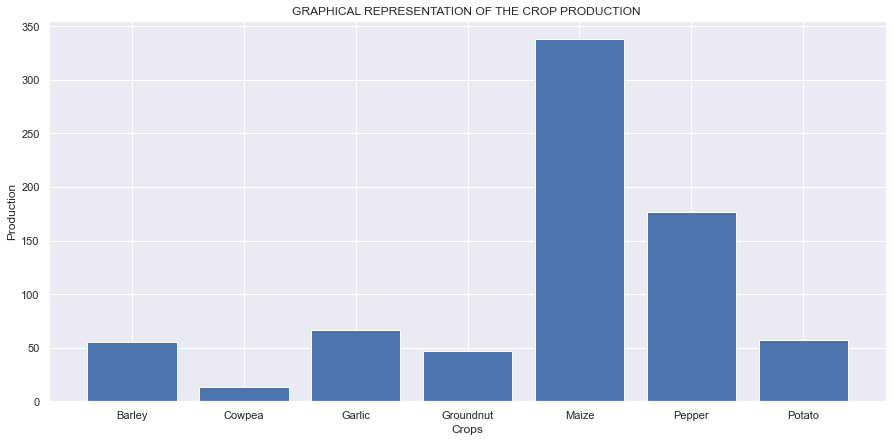

In [51]:
# Graphical plot of Crop present production 
barplt, ax = plt.subplots(figsize = (15,7))
CROPS = [Crop for Crop,cropyield in cropyield.groupby('Crop')]
plt.bar(CROPS,Crop['Production'])
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('GRAPHICAL REPRESENTATION OF THE CROP PRODUCTION ')
plt.show()


In [52]:
categorical = ['Crop']
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for car in categorical:
    cropyield[car] = enc.fit_transform(cropyield[car])

In [53]:
X1 = cropyield[['Crop','Ph','Temperature','Soil Moisture','Rainfall','Sunlight Intesity']]
Y1 = cropyield.Production

In [54]:
from sklearn.model_selection import train_test_split

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size= 0.2,random_state=1)

In [55]:
#linear_regression
from sklearn.linear_model import LinearRegression
# Instantiate model
lm_2 = LinearRegression()
# Fit Model
lm_2.fit(X1_train, y1_train)

LinearRegression()

In [56]:
score = lm_2.score(X1_test,y1_test)
print("The accuracy of this model is: ", score*100)

The accuracy of this model is:  65.0139033892499


In [76]:
# Predict
y1_pred = lm_2.predict(X1_test)

In [58]:
print('MAE:',metrics.mean_absolute_error(y1_test,y1_pred))
print('MSE:',metrics.mean_squared_error(y1_test,y1_pred))
print('RMsE:',np.sqrt(metrics.mean_squared_error(y1_test,y1_pred)))

MAE: 0.9132474217906968
MSE: 1.1152333066429434
RMsE: 1.0560460722160485


In [59]:
# K-nearest neighbors regression 
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X1_train,y1_train)

KNeighborsRegressor()

In [60]:
score2 = knn.score(X1_test,y1_test)
print("The accuracy of this model is: ", score2*100)

The accuracy of this model is:  68.71353960540468


In [61]:
y_pred_knn=knn.predict(X1_test)

In [62]:
print('MAE:',metrics.mean_absolute_error(y1_test,y_pred_knn))
print('MSE:',metrics.mean_squared_error(y1_test,y_pred_knn))
print('RMsE:',np.sqrt(metrics.mean_squared_error(y1_test,y_pred_knn)))

MAE: 0.5985480540540541
MSE: 0.9973019587528648
RMsE: 0.9986500682185251


In [63]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [64]:
score3 = regressor.score(X1_test,y1_test)
print("The accuracy of this model is: ", score3*100)

The accuracy of this model is:  99.64307739853125


In [65]:
y_pred = regressor.predict(X1_test)

array([0.84072, 0.26361, 1.33333, 0.83636, 0.2545 , 0.275  , 1.4    ,
       1.11343, 5.39216, 3.11835, 0.2642 , 5.46751, 1.33333, 1.10619,
       0.83688, 0.26441, 1.12406, 5.59983, 1.09943, 0.83688, 1.11705,
       0.2641 , 1.32653, 0.83721, 0.8399 , 1.31944, 1.33333, 1.33333,
       0.2545 , 0.25806, 1.     , 3.11835, 0.26418, 0.26269, 0.8399 ,
       3.12838, 5.50331, 1.3125 , 0.83688, 5.57114, 0.83714, 5.39216,
       3.     , 1.10833, 3.12838, 1.10638, 1.33333, 1.33333, 0.275  ,
       4.21753, 0.26418, 1.33333, 0.26761, 1.33333, 0.83916, 5.39216,
       0.26361, 0.83797, 3.     , 3.     , 0.84015, 0.83529, 1.33333,
       1.33333, 5.55283, 0.2641 , 5.39216, 1.33333, 1.3    , 0.83721,
       5.50331, 1.     , 5.4537 , 5.35009])

In [66]:
# RMSE
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y1_test, y_pred))
print('Root Mean Square error is: ',rmse)

Root Mean Square error is:  0.10666505090133216


In [67]:
print('MAE:',metrics.mean_absolute_error(y1_test,y_pred))
print('MSE:',metrics.mean_squared_error(y1_test,y_pred))
print('RMsE:',np.sqrt(metrics.mean_squared_error(y1_test,y_pred)))

MAE: 0.021855945945945972
MSE: 0.011377433083783781
RMsE: 0.10666505090133216


In [79]:
#linear_model_1 = smf.ols(formula='Production ~ Crop+Soil Moisture+Rainfall+Temperature+Ph+Sunlight Intesity', data=cropyield).fit()
#print(linear_model_1.params)

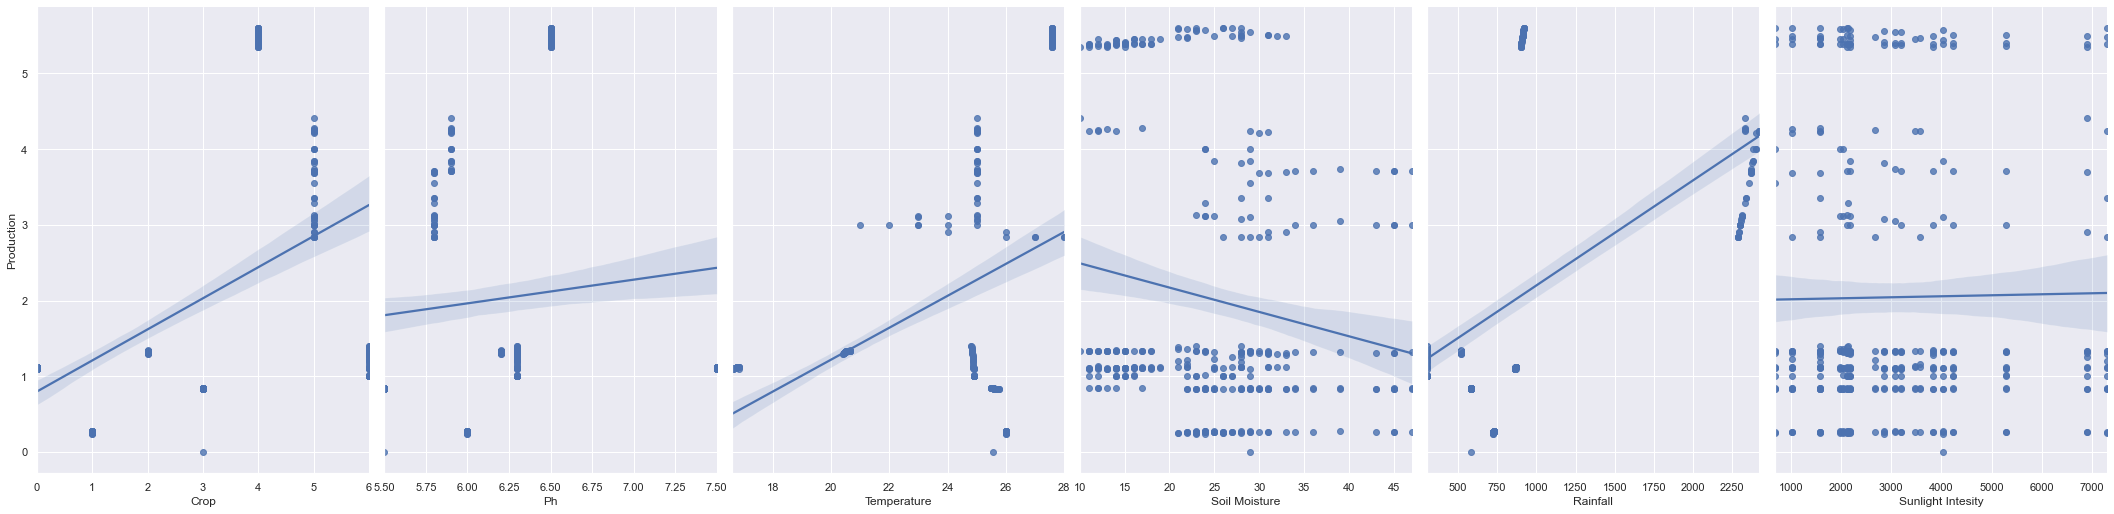

 Representation of relationship between production of crops and different parameters.


In [78]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.pairplot(cropyield, x_vars=['Crop','Ph','Temperature','Soil Moisture','Rainfall','Sunlight Intesity'], y_vars='Production', height=7, aspect=0.7,kind='reg')
plt.show()
print(' Representation of relationship between production of crops and different parameters.')

# CROP PREDICTION

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import urllib.request
import json
import time

In [93]:
READ_API_KEY='3G9GGW09Q5U4V7IK'
CHANNEL_ID= '998487'

In [94]:
#Reading the csv file
data=pd.read_csv('cpdata_update.0.csv')
print(data.head())

   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
1    21.770462  80.319644  7.038096  226.655537  rice
2    23.004459  82.320763  7.840207  263.964248  rice
3    26.491096  80.158363  6.980401  242.864034  rice
4    20.130175  81.604873  7.628473  262.717340  rice


In [95]:
#Creating dummy variable for target i.e label
label= pd.get_dummies(data.label).iloc[: , 1:]
data= pd.concat([data,label],axis=1)
data.drop('label', axis=1,inplace=True)
print('The data present in one row of the dataset is')
print(data.head(1))

The data present in one row of the dataset is
   temperature   humidity        ph    rainfall  Pigeon Peas  Sugarcane  \
0    20.879744  82.002744  6.502985  202.935536            0          0   

   maize  millet  muskmelon  rice  watermelon  
0      0       0          0     1           0  


In [96]:
train=data.iloc[:, 0:3].values
test=data.iloc[: ,4:].values

In [97]:
#Dividing the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
#Importing Decision Tree classifier
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()

In [100]:
#Fitting the classifier into training set
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
# Finding the accuracy of the model
a=accuracy_score(y_test,pred)
print("The accuracy of this model is: ", a*100)

The accuracy of this model is:  94.16666666666667


In [102]:
for i in range (1,11):
    TS = urllib.request.urlopen("http://api.thingspeak.com/channels/%s/feeds/last.json?api_key=%s" \
                       % (CHANNEL_ID,READ_API_KEY))

    response = TS.read()
    data = json.loads(response)

    a = data['created_at']
    b = data['field1']
    c = data['field2']
    d = data['field3']
    e = data['field4']

    l=[]
    l.append(b)
    l.append(c)
    l.append(d)
print(l)
print("pH of the soil is: ",d)

predictcrop=[l]
if (d<str(5.5)):
    print("The soil is deficient of nutrients but has minerals")
elif (str(5.5)<d<str(8)):
    print("The soil has enough nutrients")
else:
    print("The soil is deficient of nutrients and minerals")

['18.31', '24.32', '5.69']
pH of the soil is:  5.69
The soil has enough nutrients


In [103]:
# Putting the names of crop in a single list
crops=['wheat','mungbean','Tea','millet','maize','lentil','jute','cofee','cotton','ground nut','peas','rubber','sugarcane','tobacco','kidney beans','moth beans','coconut','blackgram','adzuki beans','pigeon peas','chick peas','banana','grapes','apple','mango','muskmelon','orange','papaya','watermelon','pomegranate']
cr='rice'

In [108]:
#Predicting the crop
predictions = clf.predict(predictcrop)
count=0
for i in range(0,30):
    if(predictions[0][i]==1):
        c=crops[i]
        count=count+1
        break;
    i=i+1
if(count==0):
    print('The predicted crop is %s'%cr)
else:
    print('The predicted crop is %s'%c)


print('\nThank you,Hope you like it.\nPlease,your fitback will be appreciated')

'''Sending the predicted crop to database
cp=firebase.put('/croppredicted','crop',c)'''

The predicted crop is maize

Thank you,Hope you like it.
Please,your fitback will be appreciated


"Sending the predicted crop to database\ncp=firebase.put('/croppredicted','crop',c)"